In [1]:
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from ML import Net
import cv2
import matplotlib.pyplot as plt


/home/enrico/anaconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
net = Net()
net.load_state_dict(torch.load("model.ebr"))
net.eval()
mapping = ['Parasitic', 'Wire_Straight_Defect', 'Wire_Straight_Perfect' , 'Wire_Tilted_Defect', 'Wire_Tilted_Perfect', 'Null']

In [3]:
def tensor_generator(path):
    image_loaded = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    transform = T.Compose([T.ToPILImage(), T.Resize((178,55)), T.ToTensor()])
    image = transform(image_loaded).unsqueeze(0)

    return image

Best guess: Wire_Tilted_Perfect


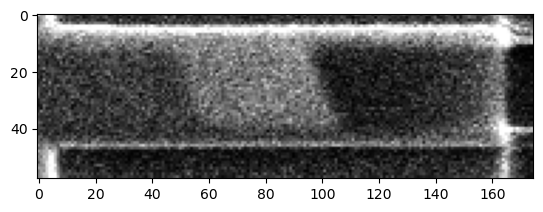

In [29]:
image_path = "/home/enrico/Desktop/Genetic_Algorithm/wires/AA32_280nm_001_20.tiff"

pred = net(tensor_generator(image_path))
probs = F.softmax(pred, dim=1)


guess = torch.argmax(probs).item()
a = mapping[guess]
print(f"Best guess: {mapping[guess]}")
plt.imshow(cv2.imread(image_path), cmap='Greys_r')
plt.show()